## Importing libraries and dataset

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
# Importing the dataset
df = pd.read_csv('amazon.csv', encoding='ANSI')

## Processing the data

In [89]:
# Handle non-numeric values: Convert non-numeric values to NaN, then fill with a default value (e.g., -1)
df['number'] = pd.to_numeric(df['number'], errors='coerce').fillna(-1)
df['year'] = pd.to_numeric(df['year'], errors='coerce').fillna(-1)

# Convert the 'number' column to integer type
df['number'] = df['number'].astype(int)

# Converting the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

## Creating visualizations

#### Line Chart: Incêndios por ano

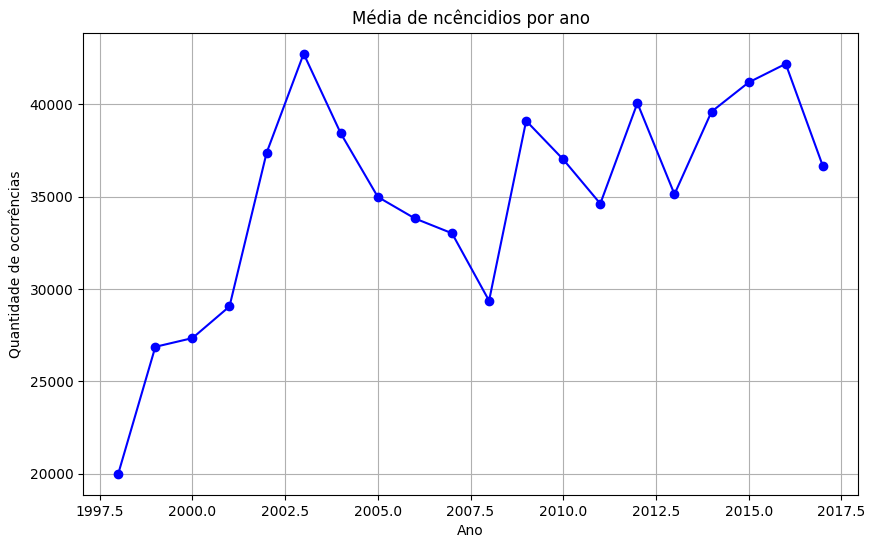

In [90]:
# Aggregating by year
yearly_data = df.groupby('year')['number'].sum().reset_index()

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['year'], yearly_data['number'], marker='o', linestyle='-', color='b')
plt.title('Média de ncêncidios por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de ocorrências')
plt.grid(True)

# Displaying the chart
plt.show()

#### Bar Chart: Incêndios por estado

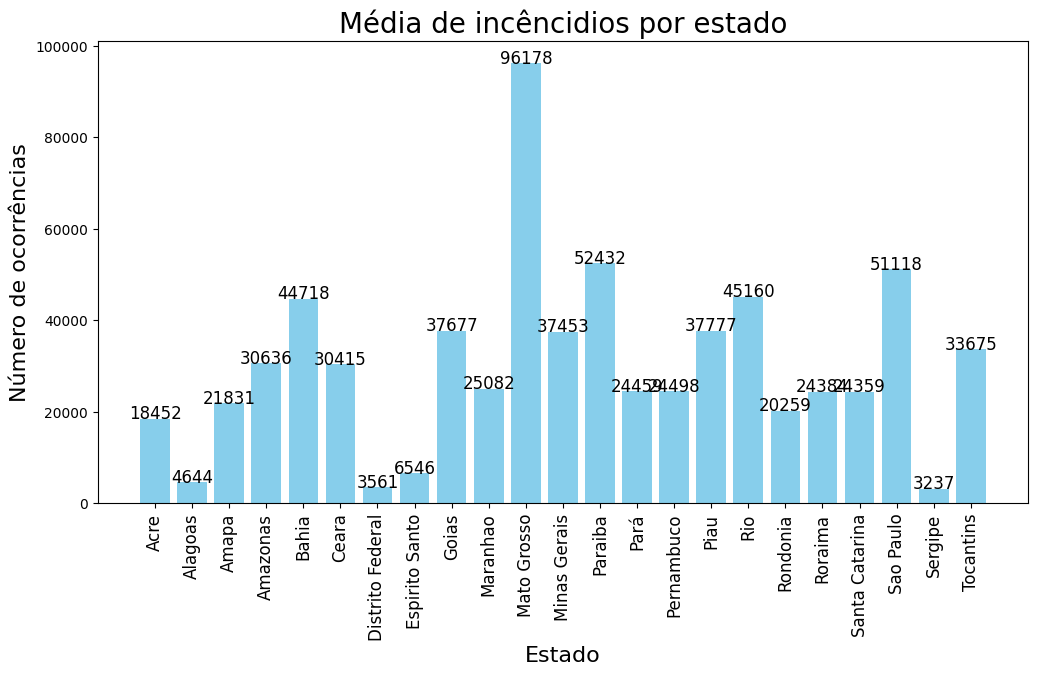

In [91]:
# Aggregating data by state
state_data = df.groupby('state')['number'].sum().reset_index()

# Creating the plot
plt.figure(figsize=(12, 6))
plt.bar(state_data['state'], state_data['number'], color='skyblue')
plt.title('Média de incêncidios por estado', fontsize=20)
plt.xlabel('Estado', fontsize=16)
plt.ylabel('Número de ocorrências', fontsize=16)
plt.xticks(rotation=90, fontsize=12)

# Adding the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha="center", fontsize=12)

plt.show()

#### Histogram: Distribuição de ocorrências

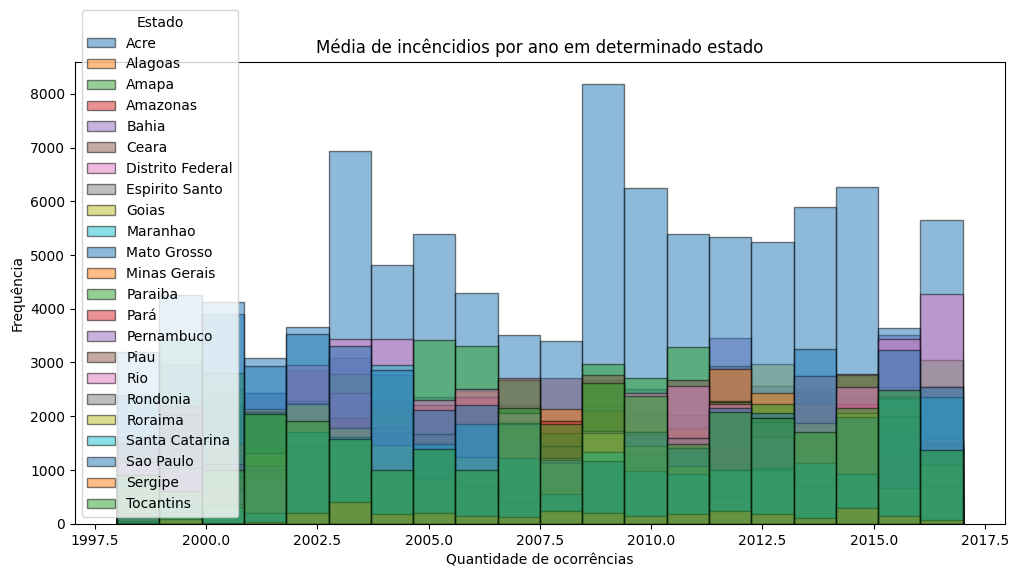

In [99]:
# Aggregating data by state and year
state_year_data = df.groupby(['state', 'year'])['number'].sum().reset_index()
states = state_year_data['state'].unique()

# Creating the plot
plt.figure(figsize=(12, 6))

for state in states:
    state_data = state_year_data[state_year_data['state'] == state]
    plt.hist(state_data['year'], weights=state_data['number'], bins=20 ,alpha=0.5, label=state, edgecolor='black')

plt.title('Média de incêncidios por ano em determinado estado')
plt.xlabel('Quantidade de ocorrências')
plt.ylabel('Frequência')
plt.legend(title='Estado')
plt.show()


#### 